In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [6]:
''' data:
Here are some factors that affects medical cost charges:

1.Age: Age in years

2.Sex: Male or Female

3.BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4.Children: Number of children covered by health insurance

5.Smoker: Whether smoker or not

6.Region: Which US region - NW, NE, SW, SE

7.Charges: annual Insurance charges in USD
'''

' data:\nHere are some factors that affects medical cost charges:\n\n1.Age: Age in years\n\n2.Sex: Male or Female\n\n3.BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9\n\n4.Children: Number of children covered by health insurance\n\n5.Smoker: Whether smoker or not\n\n6.Region: Which US region - NW, NE, SW, SE\n\n7.Charges: annual Insurance charges in USD\n'

In [7]:
# Loading the dataset
# You can download it from: https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction
# Or use the provided path if it's local.
file_path = r"C:\Users\SunByte\Desktop\desktab\ML\ML codes\linear_regresion\data\Medical-Insurance.csv"
column_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
data = pd.read_csv(file_path, names=column_names, header=None)

# Quick look at the data
# print(data.head())
# print(data.describe())
# print(data.info())

In [8]:
# Cleaning up missing values
# Replace "?" with NaN, then impute missing values.
# For numeric columns, use mean; for categorical, use mode (most frequent value).
data = data.replace("?", np.nan)

numeric_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'smoker', 'region']
# print(data)

# Impute numeric columns with mean
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")
    data[col].fillna(data[col].mean(), inplace=True)

# Impute categorical columns with mode
for col in categorical_cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")
    data[col].fillna(data[col].mode()[0], inplace=True)

# Check for any remaining missing values
# print(data.isnull().sum())

C:\Users\SunByte\AppData\Local\Temp\ipykernel_10584\1565256272.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\SunByte\AppData\Local\Temp\ipykernel_10584\1565256272.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [9]:
# Separate features and target
X = data.drop('charges', axis=1)
y = data['charges']

In [10]:
# Handling categorical variables
# We'll use one-hot encoding for 'sex', 'smoker', and 'region' to convert them into numeric features.
# This creates binary columns (e.g., sex_male, smoker_yes) suitable for regression.

# Preprocessor: scale numeric + one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

# Build pipeline: preprocessing + regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [11]:
# Splitting into train and test sets
train_size = 1800
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (1800, 6), Test shape: (972, 6)


In [12]:
# Train model
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [13]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [14]:
# Evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)


print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Train MSE: 36632915.79
Test MSE: 37115364.56


In [15]:
# First 10 predictions
print("First 10 test predictions vs actual:")
for pred, actual in zip(y_test_pred[:10], y_test[:10]):
    print(f"Pred: {pred:.2f}, Actual: {actual:.2f}")

First 10 test predictions vs actual:
Pred: 4414.83, Actual: 2134.90
Pred: 10421.33, Actual: 7345.73
Pred: 11927.70, Actual: 9140.95
Pred: 28839.74, Actual: 18608.26
Pred: 17190.20, Actual: 14418.28
Pred: 36958.04, Actual: 28950.47
Pred: 38792.10, Actual: 46889.26
Pred: 38668.93, Actual: 46599.11
Pred: 33626.69, Actual: 39125.33
Pred: 4718.00, Actual: 2727.40


In [16]:
# Feature importance
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
coefficients = model.named_steps['regressor'].coef_
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df.sort_values(by='Coefficient', ascending=False))

           Feature   Coefficient
4  cat__smoker_1.0  23819.662745
1         num__bmi  12319.535130
0         num__age  11950.994920
2    num__children   2338.854720
3       cat__sex_2    146.323310
5    cat__region_2    109.373936
6    cat__region_3   -587.429597
7    cat__region_4   -858.982755


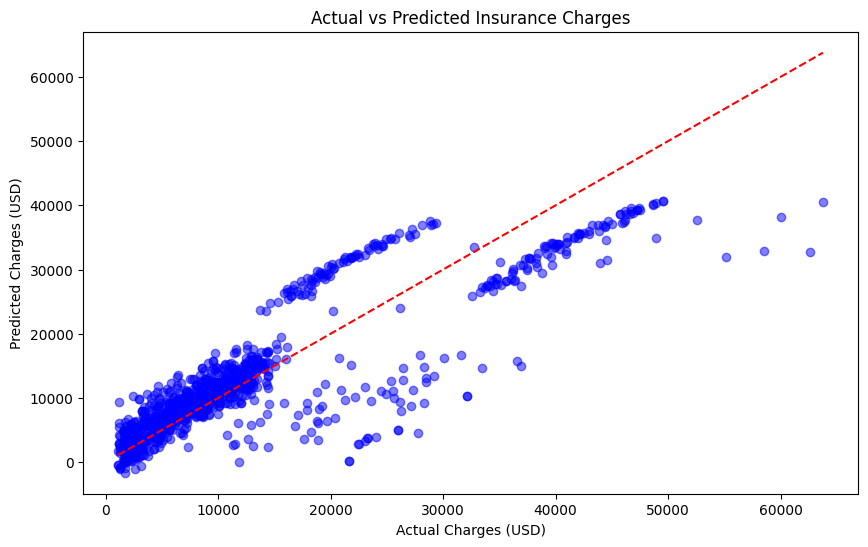

In [17]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges (USD)")
plt.ylabel("Predicted Charges (USD)")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()